<a href="https://colab.research.google.com/github/christinabrnn/NYC-Taxi-Project/blob/main/analysis-results%20_sectionB_team3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fair Fare: A Deep Dive into Taxi Price Fluctuations and Congestion Pricing in New York City

Section: B1

Team Number: Team 3

Members: Jooyeon Lee, Jeonghee (Christina) Son, Crystal Leatvanich, Courtney Vincent

Date: March 3, 2025

## Proposal

New York City taxi fares vary by location, time, and other factors, but the lack of pricing transparency raises concerns about fairness, especially in congestion pricing. High fares have driven many riders to alternatives like Uber and Lyft. This analysis explores how taxi fares fluctuate based on ride characteristics and identifies disproportionate pricing, particularly the impact of additional surcharges on different trip types. Based on these findings, we aim to improve fare transparency and passenger trust.

The findings will assess fare equity across neighborhoods and provide strategic insights into minimizing congestion-related costs while improving the rider experience. By highlighting fare inconsistencies and improving pricing transparency, this analysis aims to help passengers better anticipate their taxi fares, reduce unexpected costs, and enhance overall customer satisfaction through clearer pricing structures and better communication of fare components.


## Exploratory Data Analysis (EDA)

### Data Source

[NYC Taxi Trip Data](https://data.cityofnewyork.us/Transportation/2023-Yellow-Taxi-Trip-Data/4b4i-vvec/about_data)

The dataset consists of trip records submitted by New York City's yello taxi Technology Service Providers, containing details such as pickup and drop-off dates/times, locations, distances and fares. Originally, it spanned around 38 million rows with a total size of 3.52 GB. However, due to its large size, we applied random sampling, reducing it to 200,000 rows with 19 columns for analysis.

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
taxi_data = pd.read_csv('/content/drive/MyDrive/BA820-Group Project/sampled_data.csv')

Mounted at /content/drive


In [ ]:
#code for jupyter notebook
import os
import pandas as pd
taxi_data = os.chdir("/Users/christina/Downloads/")

taxi_data = pd.read_csv("sampled_data.csv")
print(taxi_data)

        VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0              1  10/26/2023 06:47:26 PM  10/26/2023 07:11:34 PM   
1              2  08/29/2023 12:10:22 PM  08/29/2023 12:15:13 PM   
2              1  10/12/2023 08:51:29 AM  10/12/2023 08:57:07 AM   
3              2  09/14/2023 05:06:53 PM  09/14/2023 05:17:53 PM   
4              1  05/06/2023 02:11:12 PM  05/06/2023 02:16:21 PM   
...          ...                     ...                     ...   
199995         1  09/29/2023 04:49:47 PM  09/29/2023 04:58:13 PM   
199996         2  01/15/2023 09:45:12 PM  01/15/2023 09:59:10 PM   
199997         2  05/07/2023 09:24:52 PM  05/07/2023 09:29:14 PM   
199998         2  10/04/2023 06:59:49 PM  10/04/2023 07:04:11 PM   
199999         2  03/10/2023 12:56:46 PM  03/10/2023 01:04:41 PM   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           3.30         1.0                  N   
1                   1.0           0.8

###Summary Statistics

In [2]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               200000 non-null  int64  
 1   tpep_pickup_datetime   200000 non-null  object 
 2   tpep_dropoff_datetime  200000 non-null  object 
 3   passenger_count        193101 non-null  float64
 4   trip_distance          200000 non-null  float64
 5   RatecodeID             193101 non-null  float64
 6   store_and_fwd_flag     193101 non-null  object 
 7   PULocationID           200000 non-null  int64  
 8   DOLocationID           200000 non-null  int64  
 9   payment_type           200000 non-null  int64  
 10  fare_amount            200000 non-null  float64
 11  extra                  200000 non-null  float64
 12  mta_tax                200000 non-null  float64
 13  tip_amount             200000 non-null  float64
 14  tolls_amount           200000 non-nu

In [3]:
num_columns = taxi_data.select_dtypes(include=['number'])
num_columns.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,200000.000000,193101.000000,200000.000000,193101.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,193101.000000,193101.000000
mean,1.738495,1.374866,4.785999,1.634005,165.369115,163.796390,1.184465,19.444202,1.554802,0.485714,3.507406,0.582085,0.979696,28.359865,2.266262,0.138672
std,0.444883,0.896346,304.341505,7.374074,63.925262,69.928236,0.554237,18.830230,1.831698,0.107858,4.033558,2.177846,0.197667,23.466912,0.795142,0.466193
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-500.000000,-7.500000,-0.500000,-22.200000,-27.550000,-1.000000,-451.000000,-2.500000,-1.750000
25%,1.000000,1.000000,1.040000,1.000000,132.000000,113.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.950000,2.500000,0.000000
50%,2.000000,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.800000,0.000000,1.000000,21.000000,2.500000,0.000000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.410000,0.000000,1.000000,30.720000,2.500000,0.000000
max,6.000000,7.000000,119576.840000,99.000000,265.000000,265.000000,4.000000,637.900000,12.750000,0.800000,170.000000,132.040000,1.000000,656.150000,2.500000,1.750000


In [4]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,10/26/2023 06:47:26 PM,10/26/2023 07:11:34 PM,1.0,3.30,1.0,N,186,263,1,19.8,5.0,0.5,5.25,0.0,1.0,31.55,2.5,0.0
1,2,08/29/2023 12:10:22 PM,08/29/2023 12:15:13 PM,1.0,0.82,1.0,N,234,170,1,7.2,0.0,0.5,2.00,0.0,1.0,13.20,2.5,0.0
2,1,10/12/2023 08:51:29 AM,10/12/2023 08:57:07 AM,1.0,0.70,1.0,N,238,238,1,7.2,2.5,0.5,2.20,0.0,1.0,13.40,2.5,0.0
3,2,09/14/2023 05:06:53 PM,09/14/2023 05:17:53 PM,1.0,0.30,1.0,N,48,50,1,10.0,2.5,0.5,3.30,0.0,1.0,19.80,2.5,0.0
4,1,05/06/2023 02:11:12 PM,05/06/2023 02:16:21 PM,4.0,0.80,1.0,N,229,233,2,7.2,2.5,0.5,0.00,0.0,1.0,11.20,2.5,0.0


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6899
trip_distance               0
RatecodeID               6899
store_and_fwd_flag       6899
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6899
airport_fee              6899
dtype: int64


<Axes: >

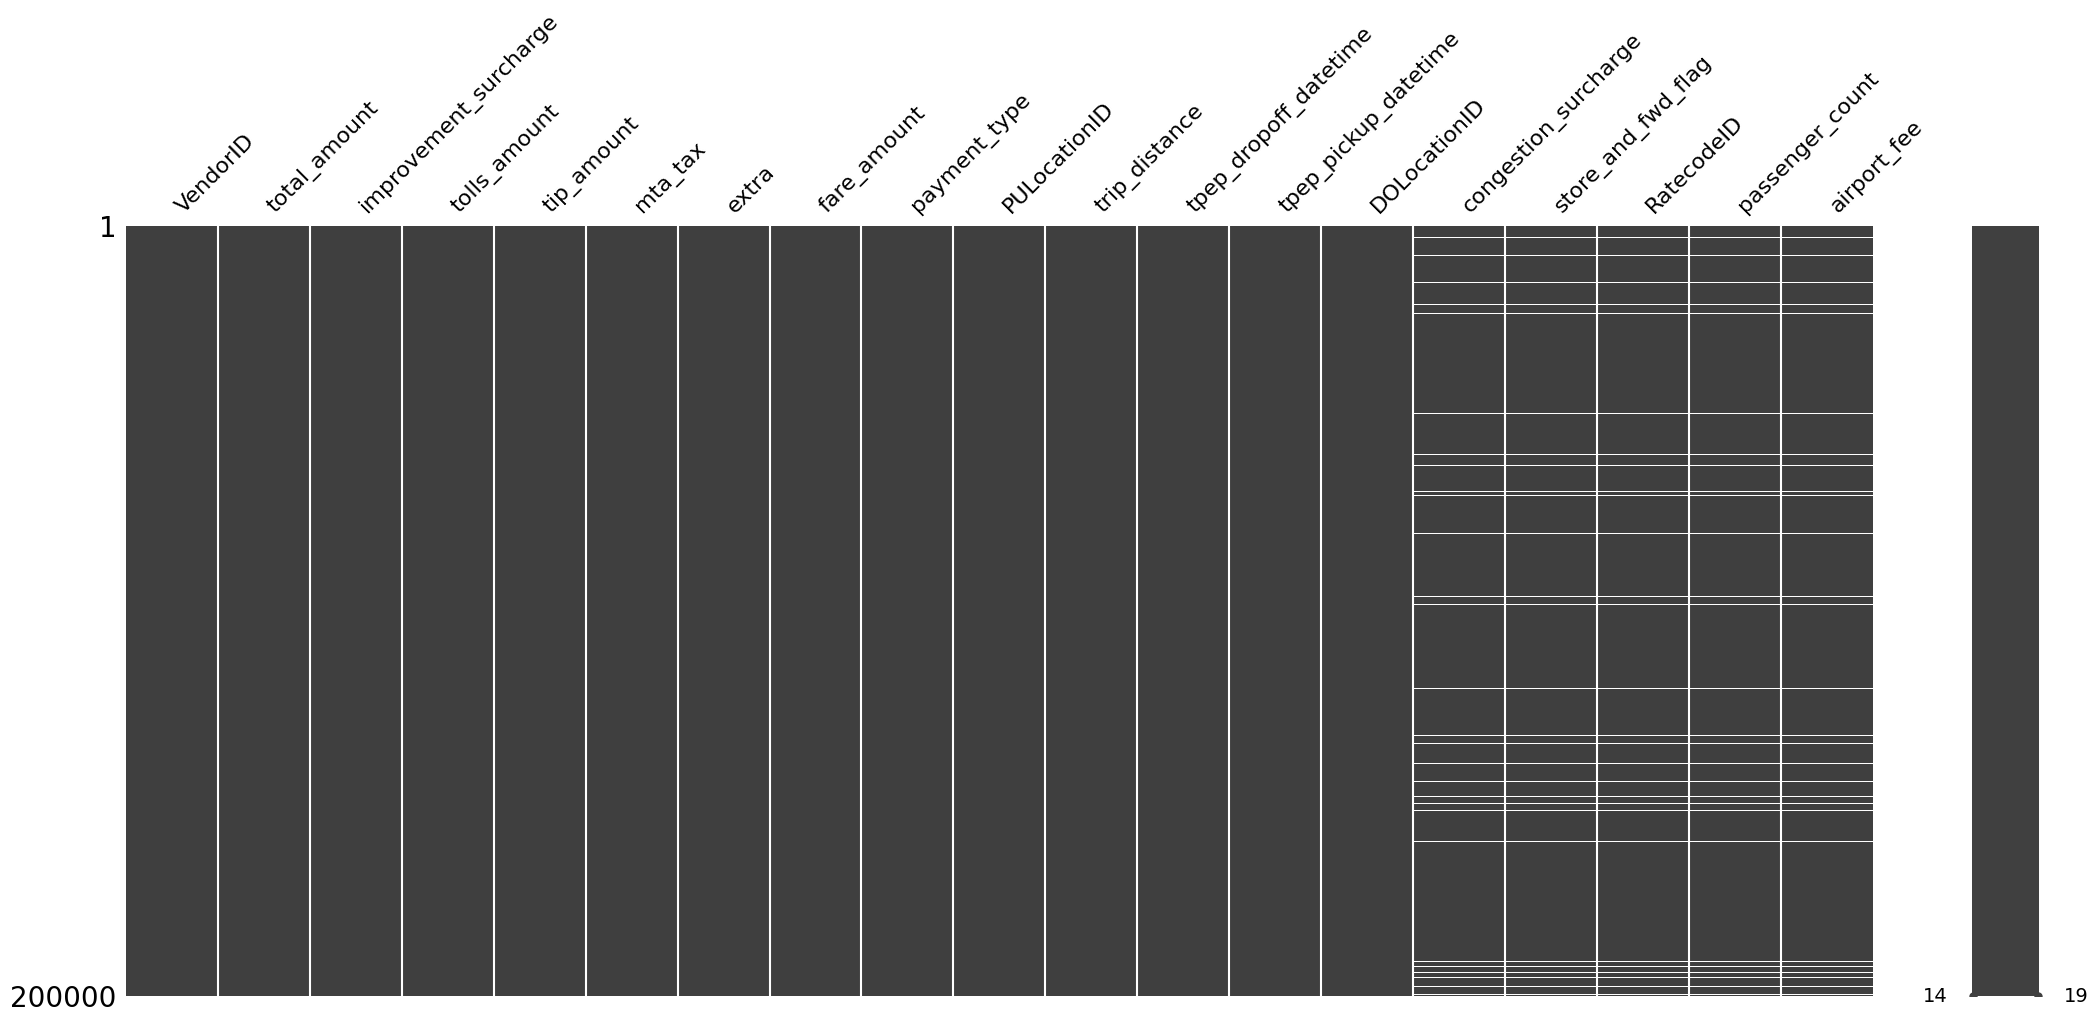

In [5]:
import missingno as msno
print(taxi_data.isnull().sum())
msno.matrix(taxi_data[taxi_data.isnull().sum().sort_values().index])

###Outliers and Patterns

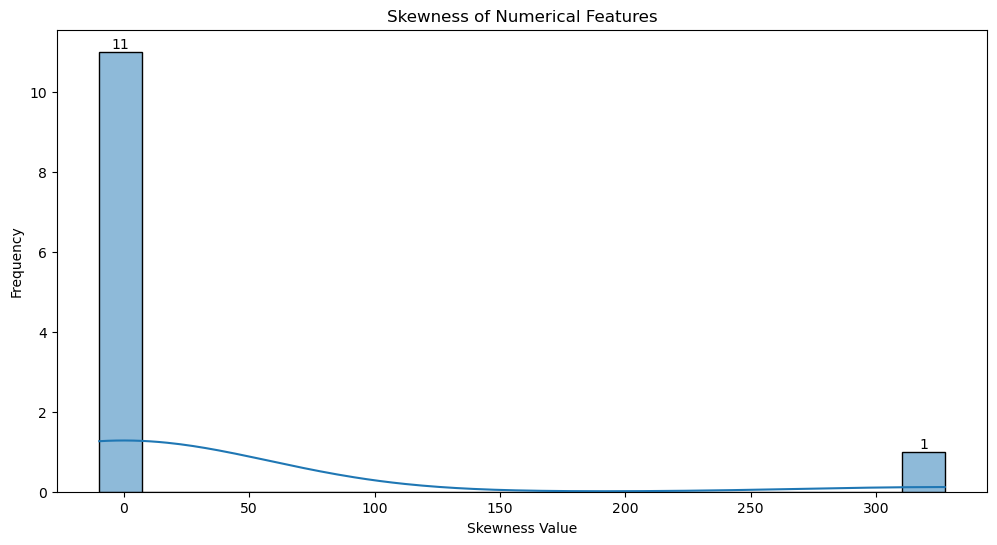

In [ ]:
#skew chart to spot outliers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

skewness_values = taxi_data.select_dtypes(include=[np.number]).apply(skew)

plt.figure(figsize=(12, 6))
ax = sns.histplot(skewness_values, bins=20, kde=True)

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width() / 2, height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Skewness of Numerical Features")
plt.xlabel("Skewness Value")
plt.ylabel("Frequency")
plt.show()

The histogram shows the skewness of numerical features, indicating how balanced or imbalanced their distributions are. The X-axis represents skewness values (0 = normal, higher values = right-skewed), while the Y-axis shows the number of features in each range. Most features have skewness between 0 and 5, meaning they are nearly normal or moderately skewed. However, one feature has extreme skewness, making it a clear outlier with a highly imbalanced distribution. This could distort analysis and may require further investigation or transformation to ensure more reliable results.

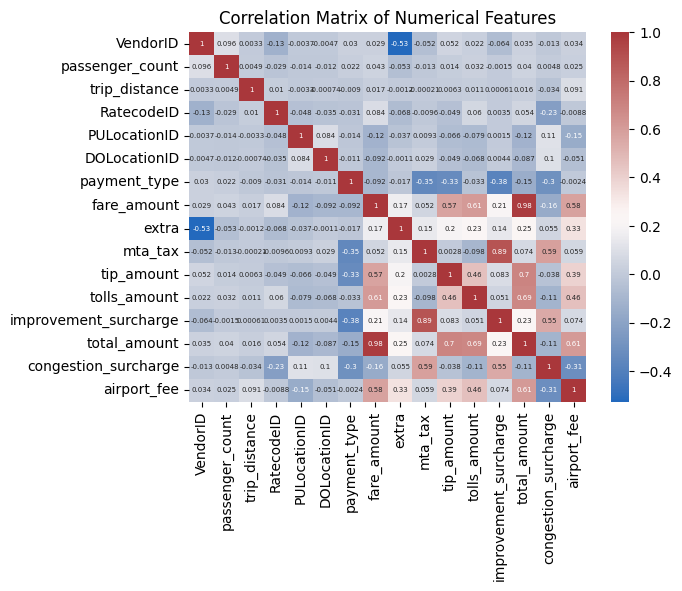

In [ ]:
#check for patterns
import seaborn as sns
import matplotlib.pyplot as plt

corr = taxi_data.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap="vlag", annot_kws={"size": 5})
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               200000 non-null  int64  
 1   tpep_pickup_datetime   200000 non-null  object 
 2   tpep_dropoff_datetime  200000 non-null  object 
 3   passenger_count        193101 non-null  float64
 4   trip_distance          200000 non-null  float64
 5   RatecodeID             193101 non-null  float64
 6   store_and_fwd_flag     193101 non-null  object 
 7   PULocationID           200000 non-null  int64  
 8   DOLocationID           200000 non-null  int64  
 9   payment_type           200000 non-null  int64  
 10  fare_amount            200000 non-null  float64
 11  extra                  200000 non-null  float64
 12  mta_tax                200000 non-null  float64
 13  tip_amount             200000 non-null  float64
 14  tolls_amount           200000 non-nu

/Users/christina/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


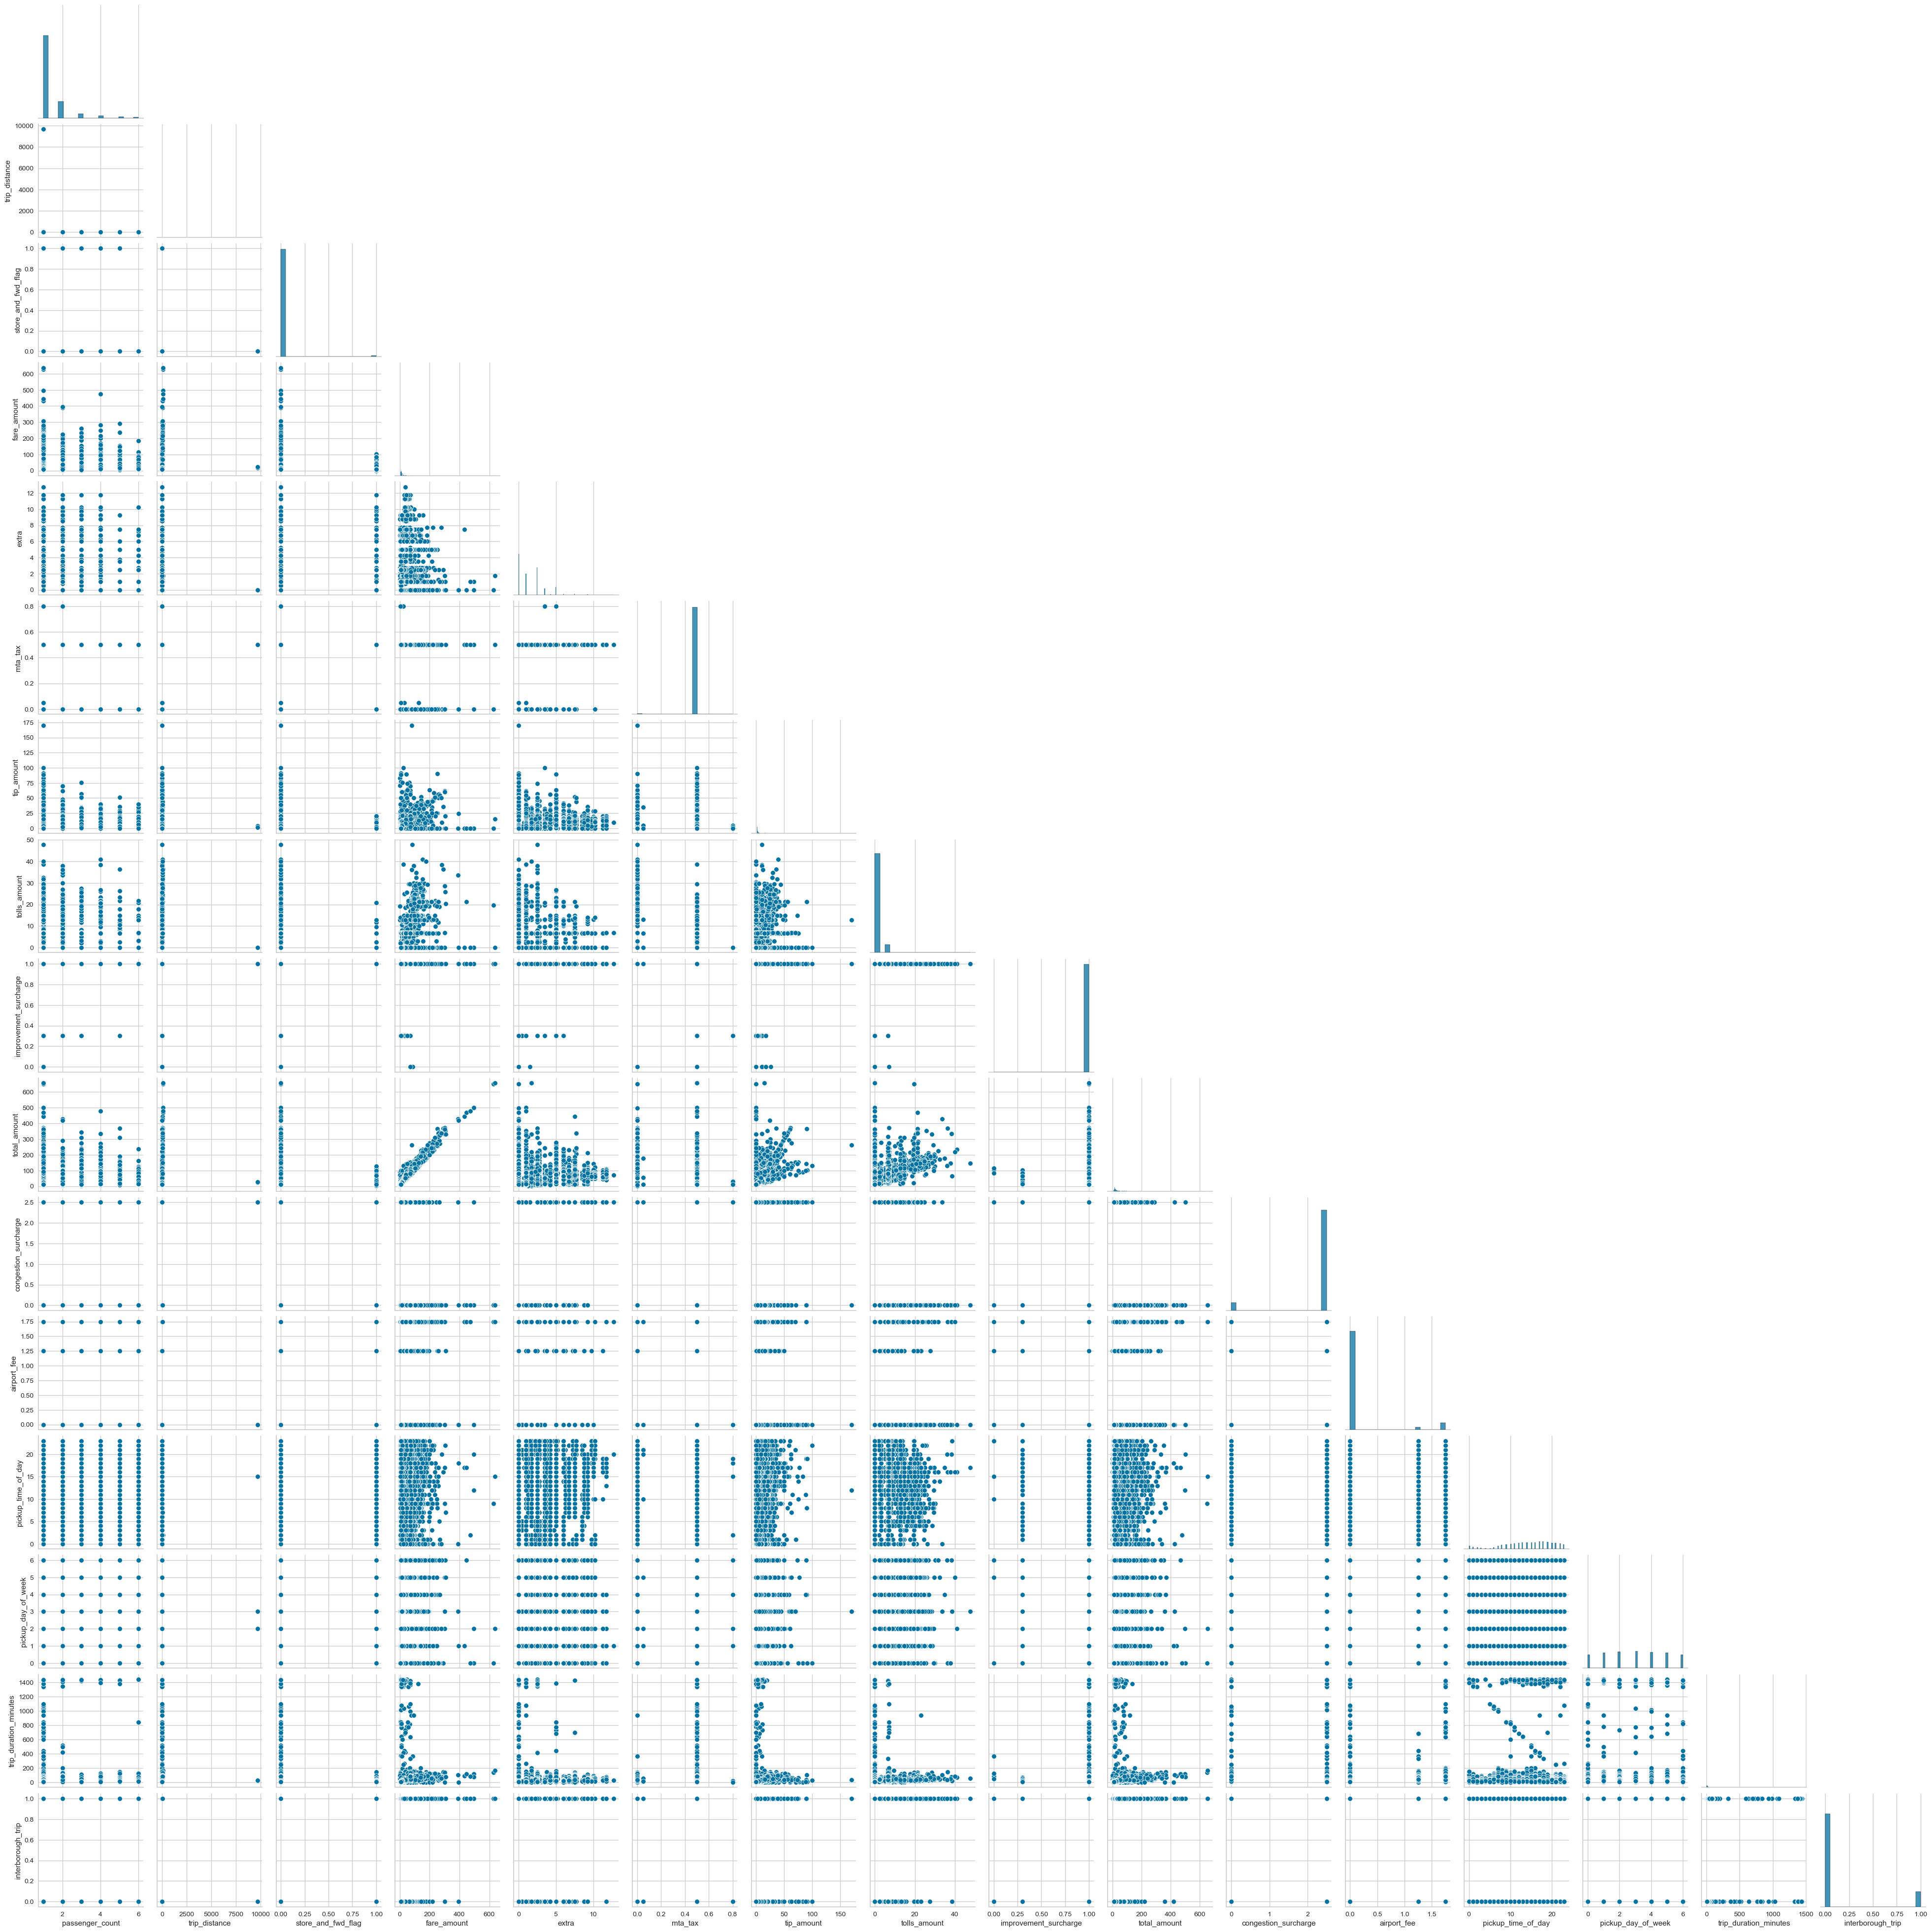

In [ ]:
#pairplot
num_cols = taxi_data.select_dtypes(include=['number'])
sns.pairplot(num_cols.select_dtypes(include=['number']), corner=True)

## Preprocessing



The preprocessing of the dataset consisted of several key steps to ensure accuracy and consistency. An initial examination of missing data revealed that missing values were all located within the same rows. As a result, 6.8k rows with null values were removed. Columns were updated to their correct data types. This included converting certain fields from numerical to categorical variables to better represent vendor IDs, location IDs, and payment types. Additionally, timestamps for pickup and drop off times were put into their proper formats. To address inconsistencies, any instances where the passenger count was recorded as 0 were updated to 1, as a taxi ride should have at least one passenger. Rows where the recorded trip distance was zero were also removed as they were likely erroneous. Many rows contained negative values in fields such as fare amount, MTA tax, tip amount, toll amount, and total amount. Since these values should not be negative, only rows with positive amounts were retained. Lastly, a check for duplicate entries was performed, but none were found.

###Data Cleaning

In [ ]:
#check wether the null columns are all the same null rows
null_test = taxi_data[taxi_data['passenger_count'].isna()][['passenger_count','RatecodeID','store_and_fwd_flag','congestion_surcharge','airport_fee']]
print(null_test.isna().sum())

passenger_count         6899
RatecodeID              6899
store_and_fwd_flag      6899
congestion_surcharge    6899
airport_fee             6899
dtype: int64


In [ ]:
#drop null passengers to drop all other nulls
taxi_data.dropna(subset = ['passenger_count'],inplace = True)
taxi_data.isnull().sum()

#reset index
taxi_data.reset_index(drop = True,inplace = True)

In [ ]:
#update columns to correct type (categories / timestamp)
change_categories = ['VendorID','RatecodeID','PULocationID','DOLocationID','payment_type']
taxi_data[change_categories] = taxi_data[change_categories].astype('category')

taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

taxi_data.info()

/var/folders/1z/cszw79s57xlcbdgy54fblh9c0000gn/T/ipykernel_25749/3135870228.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
/var/folders/1z/cszw79s57xlcbdgy54fblh9c0000gn/T/ipykernel_25749/3135870228.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193101 entries, 0 to 193100
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               193101 non-null  category      
 1   tpep_pickup_datetime   193101 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  193101 non-null  datetime64[ns]
 3   passenger_count        193101 non-null  float64       
 4   trip_distance          193101 non-null  float64       
 5   RatecodeID             193101 non-null  category      
 6   store_and_fwd_flag     193101 non-null  object        
 7   PULocationID           193101 non-null  category      
 8   DOLocationID           193101 non-null  category      
 9   payment_type           193101 non-null  category      
 10  fare_amount            193101 non-null  float64       
 11  extra                  193101 non-null  float64       
 12  mta_tax                193101 non-null  floa

In [ ]:
#convert passenger_count = 0 values to passenger_count = 1
taxi_data.loc[taxi_data['passenger_count'] == 0,'passenger_count'] = 1

#drop rows where trip_distance = 0
taxi_data = taxi_data[taxi_data['trip_distance'] > 0]
taxi_data.reset_index(drop=True, inplace=True)

#store_and_fwd_flag = N > 0 / store_and_fwd_flag = Y > 1
taxi_data['store_and_fwd_flag'] = taxi_data['store_and_fwd_flag'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
#identify negative values in columns
neg_total_amt = taxi_data[taxi_data['total_amount'] < 0]['total_amount'].count()
neg_fare_amt = taxi_data[taxi_data['fare_amount'] < 0]['fare_amount'].count()
neg_extra = taxi_data[taxi_data['extra'] < 0]['extra'].count()
neg_mta_tax = taxi_data[taxi_data['mta_tax'] < 0]['mta_tax'].count()
neg_tip_amt = taxi_data[taxi_data['tip_amount'] < 0]['tip_amount'].count()
neg_tolls_amount = taxi_data[taxi_data['tolls_amount'] < 0]['tolls_amount'].count()
neg_improvement_surcharge = taxi_data[taxi_data['improvement_surcharge'] < 0]['improvement_surcharge'].count()
neg_congestion_surcharge = taxi_data[taxi_data['congestion_surcharge'] < 0]['congestion_surcharge'].count()
neg_airport_fee = taxi_data[taxi_data['airport_fee'] < 0]['airport_fee'].count()

print(f'neg_total_amt: {neg_total_amt}')
print(f'neg_fare_amt: {neg_fare_amt}')
print(f'neg_extra: {neg_extra}')
print(f'neg_mta_tax: {neg_mta_tax}')
print(f'neg_tip_amt: {neg_tip_amt}')
print(f'neg_tolls_amount: {neg_tolls_amount}')
print(f'neg_improvement_surcharge: {neg_improvement_surcharge}')
print(f'neg_congestion_surcharge: {neg_congestion_surcharge}')
print(f'neg_airport_fee: {neg_airport_fee}')

neg_total_amt: 1731
neg_fare_amt: 1722
neg_extra: 913
neg_mta_tax: 1697
neg_tip_amt: 1
neg_tolls_amount: 121
neg_improvement_surcharge: 1731
neg_congestion_surcharge: 1480
neg_airport_fee: 215


In [ ]:
#Filter negative values
taxi_data = taxi_data[taxi_data['total_amount'] > 0]
taxi_data.reset_index(drop=True, inplace=True)
taxi_data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,188883,188883,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000
mean,2023-07-01 20:56:38.542489600,2023-07-01 21:14:01.442660352,1.391152,3.582175,0.006062,19.608243,1.639531,0.496717,3.567819,0.588801,0.999671,28.740506,2.323846,0.142015
min,2008-12-31 23:34:45,2008-12-31 23:49:52,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2023-04-01 22:42:08.500000,2023-04-01 22:55:40,1.000000,1.080000,0.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000
50%,2023-06-25 19:52:34,2023-06-25 20:13:09,1.000000,1.800000,0.000000,13.500000,1.000000,0.500000,2.860000,0.000000,1.000000,21.000000,2.500000,0.000000
75%,2023-10-05 18:31:02.500000,2023-10-05 18:48:40.500000,1.000000,3.400000,0.000000,21.900000,2.500000,0.500000,4.450000,0.000000,1.000000,30.600000,2.500000,0.000000
max,2023-12-31 23:52:35,2024-01-01 18:55:59,6.000000,9674.500000,1.000000,637.900000,12.750000,0.800000,170.000000,47.750000,1.000000,656.150000,2.500000,1.750000
std,NaN,NaN,0.882411,31.796168,0.077622,17.970805,1.825246,0.040442,3.980074,2.139402,0.015375,22.565650,0.639810,0.463714


### Feature Engineering

In [ ]:
# timestamp -> time of day(morning,afternoon,night)
# morning(6-12), afternoon(12-18), night (18-6)
taxi_data['pickup_time_of_day'] = taxi_data['tpep_pickup_datetime'].dt.hour

# Function to bucket hours into time periods
def categorize_time(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Night"

# Apply function to create a new column
taxi_data['time_of_day'] = taxi_data['pickup_time_of_day'].apply(categorize_time)

taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_time_of_day,time_of_day
0,1,2023-10-26 18:47:26,2023-10-26 19:11:34,1.0,3.30,1.0,0,186,263,1,...,5.0,0.5,5.25,0.0,1.0,31.55,2.5,0.0,18,Night
1,2,2023-08-29 12:10:22,2023-08-29 12:15:13,1.0,0.82,1.0,0,234,170,1,...,0.0,0.5,2.00,0.0,1.0,13.20,2.5,0.0,12,Afternoon
2,1,2023-10-12 08:51:29,2023-10-12 08:57:07,1.0,0.70,1.0,0,238,238,1,...,2.5,0.5,2.20,0.0,1.0,13.40,2.5,0.0,8,Morning
3,2,2023-09-14 17:06:53,2023-09-14 17:17:53,1.0,0.30,1.0,0,48,50,1,...,2.5,0.5,3.30,0.0,1.0,19.80,2.5,0.0,17,Afternoon
4,1,2023-05-06 14:11:12,2023-05-06 14:16:21,4.0,0.80,1.0,0,229,233,2,...,2.5,0.5,0.00,0.0,1.0,11.20,2.5,0.0,14,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188878,1,2023-01-12 17:19:40,2023-01-12 17:38:07,1.0,1.70,1.0,0,161,236,1,...,5.0,0.5,5.55,0.0,1.0,27.65,2.5,0.0,17,Afternoon
188879,2,2023-01-15 21:45:12,2023-01-15 21:59:10,1.0,2.08,1.0,0,186,107,1,...,1.0,0.5,3.98,0.0,1.0,23.88,2.5,0.0,21,Night
188880,2,2023-05-07 21:24:52,2023-05-07 21:29:14,1.0,1.08,1.0,0,90,114,1,...,1.0,0.5,1.00,0.0,1.0,13.20,2.5,0.0,21,Night
188881,2,2023-10-04 18:59:49,2023-10-04 19:04:11,1.0,0.85,1.0,0,237,236,2,...,2.5,0.5,0.00,0.0,1.0,13.00,2.5,0.0,18,Night


In [ ]:
#Timestamp -> day of week ( weekday & weekend)
#0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday
taxi_data['pickup_day_of_week'] = taxi_data['tpep_pickup_datetime'].dt.dayofweek

# Function to categorize day of the week
def categorize_day(day):
    return "Weekend" if day in [5, 6] else "Weekday"

# Apply function to create a new column
taxi_data['day_type'] = taxi_data['pickup_day_of_week'].apply(categorize_day)

taxi_data


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_time_of_day,time_of_day,pickup_day_of_week,day_type
0,1,2023-10-26 18:47:26,2023-10-26 19:11:34,1.0,3.30,1.0,0,186,263,1,...,5.25,0.0,1.0,31.55,2.5,0.0,18,Night,3,Weekday
1,2,2023-08-29 12:10:22,2023-08-29 12:15:13,1.0,0.82,1.0,0,234,170,1,...,2.00,0.0,1.0,13.20,2.5,0.0,12,Afternoon,1,Weekday
2,1,2023-10-12 08:51:29,2023-10-12 08:57:07,1.0,0.70,1.0,0,238,238,1,...,2.20,0.0,1.0,13.40,2.5,0.0,8,Morning,3,Weekday
3,2,2023-09-14 17:06:53,2023-09-14 17:17:53,1.0,0.30,1.0,0,48,50,1,...,3.30,0.0,1.0,19.80,2.5,0.0,17,Afternoon,3,Weekday
4,1,2023-05-06 14:11:12,2023-05-06 14:16:21,4.0,0.80,1.0,0,229,233,2,...,0.00,0.0,1.0,11.20,2.5,0.0,14,Afternoon,5,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188878,1,2023-01-12 17:19:40,2023-01-12 17:38:07,1.0,1.70,1.0,0,161,236,1,...,5.55,0.0,1.0,27.65,2.5,0.0,17,Afternoon,3,Weekday
188879,2,2023-01-15 21:45:12,2023-01-15 21:59:10,1.0,2.08,1.0,0,186,107,1,...,3.98,0.0,1.0,23.88,2.5,0.0,21,Night,6,Weekend
188880,2,2023-05-07 21:24:52,2023-05-07 21:29:14,1.0,1.08,1.0,0,90,114,1,...,1.00,0.0,1.0,13.20,2.5,0.0,21,Night,6,Weekend
188881,2,2023-10-04 18:59:49,2023-10-04 19:04:11,1.0,0.85,1.0,0,237,236,2,...,0.00,0.0,1.0,13.00,2.5,0.0,18,Night,2,Weekday


In [ ]:
#Minutes of traveling -> long/short trip (threshold is mean)
#pickup timestamp minus drop off to see how many minutes
taxi_data['trip_duration_minutes'] = (taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60

#look at where trip duration minutes is negative, make it positive (only 2)
taxi_data['trip_duration_minutes'] = taxi_data['trip_duration_minutes'].abs()

#out of the ordinary stuff - duration minutes = 0 -> had high(ish) total amount) fraud?
#taxi_data_tmst_test[taxi_data_tmst_test['trip_duration_minutes'] <= 0]

#use mean from the trip duration minutes as the threshold of the saying if it is a short or a long trip
mean_duration = taxi_data['trip_duration_minutes'].mean()
taxi_data['trip_length'] = taxi_data['trip_duration_minutes'].apply(lambda x: "Short" if x <= mean_duration else "Long")
taxi_data


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_time_of_day,time_of_day,pickup_day_of_week,day_type,trip_duration_minutes,trip_length
0,1,2023-10-26 18:47:26,2023-10-26 19:11:34,1.0,3.30,1.0,0,186,263,1,...,1.0,31.55,2.5,0.0,18,Night,3,Weekday,24.133333,Long
1,2,2023-08-29 12:10:22,2023-08-29 12:15:13,1.0,0.82,1.0,0,234,170,1,...,1.0,13.20,2.5,0.0,12,Afternoon,1,Weekday,4.850000,Short
2,1,2023-10-12 08:51:29,2023-10-12 08:57:07,1.0,0.70,1.0,0,238,238,1,...,1.0,13.40,2.5,0.0,8,Morning,3,Weekday,5.633333,Short
3,2,2023-09-14 17:06:53,2023-09-14 17:17:53,1.0,0.30,1.0,0,48,50,1,...,1.0,19.80,2.5,0.0,17,Afternoon,3,Weekday,11.000000,Short
4,1,2023-05-06 14:11:12,2023-05-06 14:16:21,4.0,0.80,1.0,0,229,233,2,...,1.0,11.20,2.5,0.0,14,Afternoon,5,Weekend,5.150000,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188878,1,2023-01-12 17:19:40,2023-01-12 17:38:07,1.0,1.70,1.0,0,161,236,1,...,1.0,27.65,2.5,0.0,17,Afternoon,3,Weekday,18.450000,Long
188879,2,2023-01-15 21:45:12,2023-01-15 21:59:10,1.0,2.08,1.0,0,186,107,1,...,1.0,23.88,2.5,0.0,21,Night,6,Weekend,13.966667,Short
188880,2,2023-05-07 21:24:52,2023-05-07 21:29:14,1.0,1.08,1.0,0,90,114,1,...,1.0,13.20,2.5,0.0,21,Night,6,Weekend,4.366667,Short
188881,2,2023-10-04 18:59:49,2023-10-04 19:04:11,1.0,0.85,1.0,0,237,236,2,...,1.0,13.00,2.5,0.0,18,Night,2,Weekday,4.366667,Short


In [ ]:
#Passenger count - group = 3>
taxi_data['passenger_type'] = taxi_data['passenger_count'].apply(lambda x: "Single" if x == 1 else ("Couple" if x == 2 else "Group"))
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,pickup_time_of_day,time_of_day,pickup_day_of_week,day_type,trip_duration_minutes,trip_length,passenger_type
0,1,2023-10-26 18:47:26,2023-10-26 19:11:34,1.0,3.30,1.0,0,186,263,1,...,31.55,2.5,0.0,18,Night,3,Weekday,24.133333,Long,Single
1,2,2023-08-29 12:10:22,2023-08-29 12:15:13,1.0,0.82,1.0,0,234,170,1,...,13.20,2.5,0.0,12,Afternoon,1,Weekday,4.850000,Short,Single
2,1,2023-10-12 08:51:29,2023-10-12 08:57:07,1.0,0.70,1.0,0,238,238,1,...,13.40,2.5,0.0,8,Morning,3,Weekday,5.633333,Short,Single
3,2,2023-09-14 17:06:53,2023-09-14 17:17:53,1.0,0.30,1.0,0,48,50,1,...,19.80,2.5,0.0,17,Afternoon,3,Weekday,11.000000,Short,Single
4,1,2023-05-06 14:11:12,2023-05-06 14:16:21,4.0,0.80,1.0,0,229,233,2,...,11.20,2.5,0.0,14,Afternoon,5,Weekend,5.150000,Short,Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188878,1,2023-01-12 17:19:40,2023-01-12 17:38:07,1.0,1.70,1.0,0,161,236,1,...,27.65,2.5,0.0,17,Afternoon,3,Weekday,18.450000,Long,Single
188879,2,2023-01-15 21:45:12,2023-01-15 21:59:10,1.0,2.08,1.0,0,186,107,1,...,23.88,2.5,0.0,21,Night,6,Weekend,13.966667,Short,Single
188880,2,2023-05-07 21:24:52,2023-05-07 21:29:14,1.0,1.08,1.0,0,90,114,1,...,13.20,2.5,0.0,21,Night,6,Weekend,4.366667,Short,Single
188881,2,2023-10-04 18:59:49,2023-10-04 19:04:11,1.0,0.85,1.0,0,237,236,2,...,13.00,2.5,0.0,18,Night,2,Weekday,4.366667,Short,Single


In [ ]:
#location ID(neighborhood Manhattan,Brooklyn)
# Define the mapping of LocationID to Borough
location_borough_mapping = {
    1: "EWR", 2: "Queens", 3: "Bronx", 4: "Manhattan", 5: "Staten Island", 6: "Staten Island",
    7: "Queens", 8: "Queens", 9: "Queens", 10: "Queens", 11: "Brooklyn", 12: "Manhattan",
    13: "Manhattan", 14: "Brooklyn", 15: "Queens", 16: "Queens", 17: "Brooklyn", 18: "Bronx",
    19: "Queens", 20: "Bronx", 21: "Brooklyn", 22: "Brooklyn", 23: "Staten Island", 24: "Manhattan",
    25: "Brooklyn", 26: "Brooklyn", 27: "Queens", 28: "Queens", 29: "Brooklyn", 30: "Queens",
    31: "Bronx", 32: "Bronx", 33: "Brooklyn", 34: "Brooklyn", 35: "Brooklyn", 36: "Brooklyn",
    37: "Brooklyn", 38: "Queens", 39: "Brooklyn", 40: "Brooklyn", 41: "Manhattan", 42: "Manhattan",
    43: "Manhattan", 44: "Staten Island", 45: "Manhattan", 46: "Bronx", 47: "Bronx", 48: "Manhattan",
    49: "Brooklyn", 50: "Manhattan", 51: "Bronx", 52: "Brooklyn", 53: "Queens", 54: "Brooklyn",
    55: "Brooklyn", 56: "Queens", 57: "Queens", 58: "Bronx", 59: "Bronx", 60: "Bronx", 61: "Brooklyn",
    62: "Brooklyn", 63: "Brooklyn", 64: "Queens", 65: "Brooklyn", 66: "Brooklyn", 67: "Brooklyn",
    68: "Manhattan", 69: "Bronx", 70: "Queens", 71: "Brooklyn", 72: "Brooklyn", 73: "Queens",
    74: "Manhattan", 75: "Manhattan", 76: "Brooklyn", 77: "Brooklyn", 78: "Bronx", 79: "Manhattan",
    80: "Brooklyn", 81: "Bronx", 82: "Queens", 83: "Queens", 84: "Staten Island", 85: "Brooklyn",
    86: "Queens", 87: "Manhattan", 88: "Manhattan", 89: "Brooklyn", 90: "Manhattan", 91: "Brooklyn",
    92: "Queens", 93: "Queens", 94: "Bronx", 95: "Queens", 96: "Queens", 97: "Brooklyn", 98: "Queens",
    99: "Staten Island", 100: "Manhattan", 101: "Queens", 102: "Queens", 103: "Manhattan", 104: "Manhattan",
    105: "Manhattan", 106: "Brooklyn", 107: "Manhattan", 108: "Brooklyn", 109: "Staten Island", 110: "Staten Island",
    111: "Brooklyn", 112: "Brooklyn", 113: "Manhattan", 114: "Manhattan", 115: "Staten Island", 116: "Manhattan",
    117: "Queens", 118: "Staten Island", 119: "Bronx", 120: "Manhattan", 121: "Queens", 122: "Queens",
    123: "Brooklyn", 124: "Queens", 125: "Manhattan", 126: "Bronx", 127: "Manhattan", 128: "Manhattan",
    129: "Queens", 130: "Queens", 131: "Queens", 132: "Queens", 133: "Brooklyn", 134: "Queens", 135: "Queens",
    136: "Bronx", 137: "Manhattan", 138: "Queens", 139: "Queens", 140: "Manhattan", 141: "Manhattan",
    142: "Manhattan", 143: "Manhattan", 144: "Manhattan", 145: "Queens", 146: "Queens", 147: "Bronx",
    148: "Manhattan", 149: "Brooklyn", 150: "Brooklyn", 151: "Manhattan", 152: "Manhattan", 153: "Manhattan",
    154: "Brooklyn", 155: "Brooklyn", 156: "Staten Island", 157: "Queens", 158: "Manhattan", 159: "Bronx",
    160: "Queens", 161: "Manhattan", 162: "Manhattan", 163: "Manhattan", 164: "Manhattan", 165: "Brooklyn",
    166: "Manhattan", 167: "Bronx", 168: "Bronx", 169: "Bronx", 170: "Manhattan", 171: "Queens",
    172: "Staten Island", 173: "Queens", 174: "Bronx", 175: "Queens", 176: "Staten Island", 177: "Brooklyn",
    178: "Brooklyn", 179: "Queens", 180: "Queens", 181: "Brooklyn", 182: "Bronx", 183: "Bronx", 184: "Bronx",
    185: "Bronx", 186: "Manhattan", 187: "Staten Island", 188: "Brooklyn", 189: "Brooklyn", 190: "Brooklyn",
    191: "Queens", 192: "Queens", 193: "Queens", 194: "Manhattan", 195: "Brooklyn", 196: "Queens",
    197: "Queens", 198: "Queens", 199: "Bronx", 200: "Bronx", 201: "Queens", 202: "Manhattan",
    203: "Queens", 204: "Staten Island", 205: "Queens", 206: "Staten Island", 207: "Queens", 208: "Bronx",
    209: "Manhattan", 210: "Brooklyn", 211: "Manhattan", 212: "Bronx", 213: "Bronx", 214: "Staten Island",
    215: "Queens", 216: "Queens", 217: "Brooklyn", 218: "Queens", 219: "Queens", 220: "Bronx",
    221: "Staten Island", 222: "Brooklyn", 223: "Queens", 224: "Manhattan", 225: "Brooklyn", 226: "Queens",
    227: "Brooklyn", 228: "Brooklyn", 229: "Manhattan", 230: "Manhattan", 231: "Manhattan", 232: "Manhattan",
    233: "Manhattan", 234: "Manhattan", 235: "Bronx", 236: "Manhattan", 237: "Manhattan", 238: "Manhattan",
    239: "Manhattan", 240: "Bronx", 241: "Bronx", 242: "Bronx", 243: "Manhattan", 244: "Manhattan",
    245: "Staten Island", 246: "Manhattan", 247: "Bronx", 248: "Bronx", 249: "Manhattan", 250: "Bronx",
    251: "Staten Island", 252: "Queens", 253: "Queens", 254: "Bronx", 255: "Brooklyn", 256: "Brooklyn",
    257: "Brooklyn", 258: "Queens", 259: "Bronx", 260: "Queens", 261: "Manhattan", 262: "Manhattan",
    263: "Manhattan", 264: "Unknown", 265: "Outside of NYC"
}

# Map the LocationID to Borough (series so use .map)
taxi_data['PU_Borough'] = taxi_data['PULocationID'].map(location_borough_mapping)
taxi_data['DO_Borough'] = taxi_data['DOLocationID'].map(location_borough_mapping)

#look at the N/A in column pu_borough (1642) bo_borough (1713) overlap (1291)
#taxi_data_tmst_test[taxi_data_tmst_test['DO_Borough'] == 'Unknown']
#taxi_data_tmst_test[(taxi_data_tmst_test['PU_Borough'] == 'Unknown') & (taxi_data_tmst_test['DO_Borough'] == 'Unknown')]

#where the PU and DO borough are not the same put crossing borrough inthe column (0 - no, 1 = yes)
taxi_data['interborough_trip'] = (taxi_data['PU_Borough'] != taxi_data['DO_Borough']).astype(int)
taxi_data.groupby('DO_Borough').size()

#distance_type (chat gpt)
def get_distance_category(PU_borough, DO_borough):
    # Define the pairs and their distance categories
    far_pairs = [
        ('EWR', 'Bronx'), ('EWR', 'Staten Island'), ('EWR', 'Brooklyn'), ('EWR', 'Manhattan'),
        ('EWR', 'Queens'), ('Manhattan', 'Bronx'), ('Manhattan', 'Staten Island') ]

    close_pairs = [
        ('Manhattan', 'Brooklyn'), ('Manhattan', 'Queens'), ('Brooklyn', 'Queens')]

    moderate_pairs = [
        ('Brooklyn', 'Staten Island'), ('Bronx', 'Queens'), ('Bronx', 'Staten Island'),
        ('Queens', 'Staten Island')]

    # Check if the pickup and dropoff boroughs are the same
    if PU_borough == DO_borough:
        return "Close"

    # Check if the pair is in the far category
    if (PU_borough, DO_borough) in far_pairs or (DO_borough, PU_borough) in far_pairs:
        return "Far"

    # Check if the pair is in the close category
    if (PU_borough, DO_borough) in close_pairs or (DO_borough, PU_borough) in close_pairs:
        return "Close"

    # Otherwise, it's a moderate distance
    return "Moderate"

taxi_data['distance_category']  = taxi_data.apply(lambda row: get_distance_category(row['PU_Borough'], row['DO_Borough']), axis=1)

taxi_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188883 entries, 0 to 188882
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               188883 non-null  category      
 1   tpep_pickup_datetime   188883 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  188883 non-null  datetime64[ns]
 3   passenger_count        188883 non-null  float64       
 4   trip_distance          188883 non-null  float64       
 5   RatecodeID             188883 non-null  category      
 6   store_and_fwd_flag     188883 non-null  int64         
 7   PULocationID           188883 non-null  category      
 8   DOLocationID           188883 non-null  category      
 9   payment_type           188883 non-null  category      
 10  fare_amount            188883 non-null  float64       
 11  extra                  188883 non-null  float64       
 12  mta_tax                188883 non-null  floa

In [ ]:
#congestion_surchage
taxi_data['congestion_surcharge_type'] = taxi_data['congestion_surcharge'].apply(lambda x: "No fee" if x == 0 else "Fee")

In [ ]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_day_of_week,day_type,trip_duration_minutes,trip_length,passenger_type,PU_Borough,DO_Borough,interborough_trip,distance_category,congestion_surcharge_type
0,1,2023-10-26 18:47:26,2023-10-26 19:11:34,1.0,3.30,1.0,0,186,263,1,...,3,Weekday,24.133333,Long,Single,Manhattan,Manhattan,0,Close,Fee
1,2,2023-08-29 12:10:22,2023-08-29 12:15:13,1.0,0.82,1.0,0,234,170,1,...,1,Weekday,4.850000,Short,Single,Manhattan,Manhattan,0,Close,Fee
2,1,2023-10-12 08:51:29,2023-10-12 08:57:07,1.0,0.70,1.0,0,238,238,1,...,3,Weekday,5.633333,Short,Single,Manhattan,Manhattan,0,Close,Fee
3,2,2023-09-14 17:06:53,2023-09-14 17:17:53,1.0,0.30,1.0,0,48,50,1,...,3,Weekday,11.000000,Short,Single,Manhattan,Manhattan,0,Close,Fee
4,1,2023-05-06 14:11:12,2023-05-06 14:16:21,4.0,0.80,1.0,0,229,233,2,...,5,Weekend,5.150000,Short,Group,Manhattan,Manhattan,0,Close,Fee


## Analysis


We chose K-Means clustering to identify patterns in NYC taxi fare fluctuations and congestion pricing. Since our dataset does not have predefined labels, K-Means helps uncover hidden structures in the data, grouping trips with similar characteristics. Given the large volume of taxi trip data, K-Means is an efficient and scalable clustering algorithm.


The steps include:


1. Standardizing the Data: Ensuring all numeric variables have equal influence.
2. Applying PCA: Reducing dimensions while preserving variance.
3. Choosing Optimal Clusters: Using the Elbow Method.
4. K-Means Clustering: Assigning clusters and visualizing the results.

In [ ]:
#jupyter notebook code
!pip install psynlig

###PCA

To improve clustering performance, we first applied Principal Component Analysis (PCA) to reduce dimensionality while retaining over 90% of the variance. This step ensures that K-Means operates effectively without being affected by high-dimensional noise.

In [ ]:
#drop non-continuious numerical columns for model preperation
taxi_dataset_num = taxi_data.drop(columns=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
                                           'DOLocationID', 'payment_type', 'time_of_day', 'passenger_type', 'PU_Borough', 'DO_Borough', 'distance_category',
                                          'distance_category', 'airport_fee', 'congestion_surcharge', 'pickup_time_of_day', 'interborough_trip', 'congestion_surcharge_type',
                                           'improvement_surcharge', 'mta_tax', 'day_type', 'trip_length', 'pickup_day_of_week', 'extra', 'passenger_count'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
normalized_data = sc.fit_transform(taxi_dataset_num)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

model = PCA()
model.fit(normalized_data)

transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

transformed_data_df.columns = [f"PC{i+1}" for i in range(taxi_dataset_num.shape[1])]
transformed_data_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.167178,-0.047170,0.130931,0.498309,0.022834,-0.051626
1,-1.098143,0.027744,-0.125227,-0.056426,-0.249656,0.025840
2,-1.068056,0.018358,-0.115400,-0.017431,-0.269506,0.026370
3,-0.687456,-0.040895,-0.057796,0.177853,-0.216903,-0.056299
4,-1.361599,0.063132,-0.029212,-0.444199,-0.076025,0.020583
...,...,...,...,...,...,...
188878,-0.049957,-0.075013,-0.002447,0.580976,-0.178484,-0.050642
188879,-0.352846,-0.018279,-0.031931,0.280461,-0.081069,-0.003491
188880,-1.208065,0.053746,-0.095279,-0.250852,-0.147041,-0.010970
188881,-1.342171,0.064619,-0.052862,-0.441068,-0.070942,-0.064827


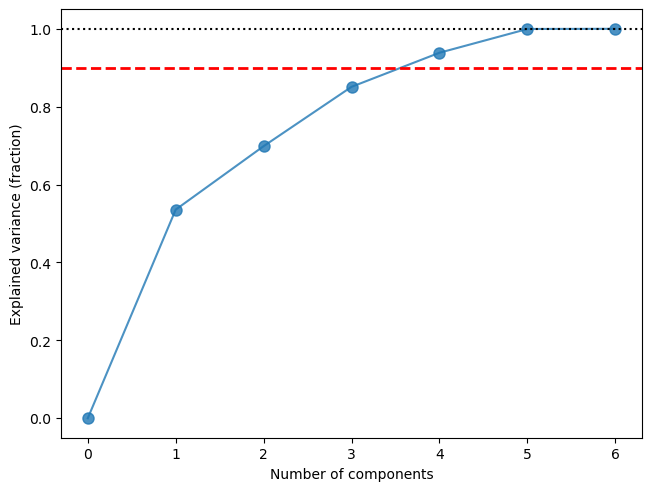

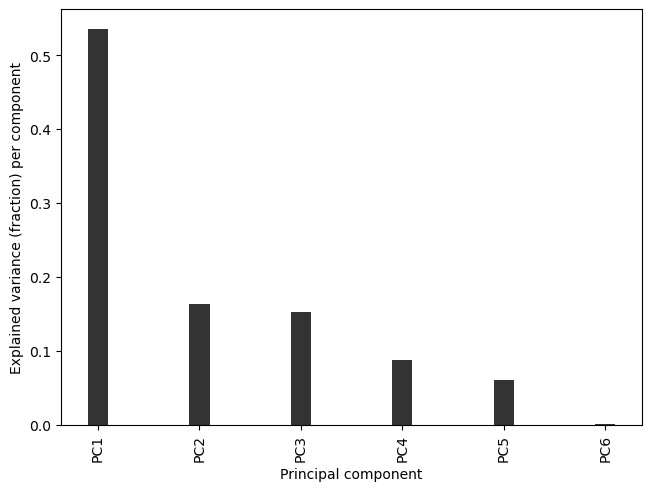

In [ ]:
# check variance to see how many features to keep

from matplotlib import pyplot as plt
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = pca_explained_variance(model,  marker='o', markersize=8, alpha=0.8)

ax.axhline(y=0.9, color='r', linestyle='--', linewidth=2)

plt.show()

pca_explained_variance_bar(
    model,
    width=0.2,
    alpha=0.8,
    color='black',
)

plt.show()

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

n= 4
model = PCA(n)

#fit the data
model.fit(normalized_data)

# transform the data
transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

# Rename the columns
transformed_data_df.columns = [f"PC{i+1}" for i in range(n)]

transformed_data_df

,PC1,PC2,PC3,PC4
0,0.167178,-0.047170,0.130931,0.498309
1,-1.098143,0.027744,-0.125227,-0.056426
2,-1.068056,0.018358,-0.115400,-0.017431
3,-0.687456,-0.040895,-0.057796,0.177853
4,-1.361599,0.063132,-0.029212,-0.444199
...,...,...,...,...
188878,-0.049957,-0.075013,-0.002447,0.580976
188879,-0.352846,-0.018279,-0.031931,0.280461
188880,-1.208065,0.053746,-0.095279,-0.250852
188881,-1.342171,0.064619,-0.052862,-0.441068


In [ ]:
#check components
components_df = pd.DataFrame(model.components_)

components_df.columns = taxi_dataset_num.columns
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]

components_df

,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,trip_duration_minutes
PC1,0.103156,0.519158,0.431069,0.442677,0.544995,0.202562
PC2,0.990751,-0.026069,-0.066405,-0.042602,-0.038328,-0.100192
PC3,0.075616,-0.032006,-0.163373,-0.169778,-0.075523,0.965422
PC4,0.023270,-0.110025,0.773857,-0.623013,-0.011230,0.015045


Based on the results, we can interpret that PC1 is strongly influenced by total_amount and fare_amount, followed by tip_amount, indicating that this component primarily captures the overall cost of a ride. PC2 is dominated by trip_distance, suggesting that it represents variations in ride distance, while the influence of other variables remains relatively small.

In [ ]:
#loadings
import numpy as np
loadings = components_df.iloc[:7, :].mul(np.sqrt(model.explained_variance_), axis=0)

loadings_df = pd.DataFrame(loadings)
loadings_df

,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,trip_duration_minutes
PC1,0.184937,0.930747,0.772820,0.793630,0.977066,0.363153
PC2,0.979662,-0.025777,-0.065662,-0.042125,-0.037899,-0.099071
PC3,0.072300,-0.030603,-0.156209,-0.162333,-0.072211,0.923087
PC4,0.016861,-0.079720,0.560706,-0.451411,-0.008136,0.010901


In [ ]:
from sklearn.metrics import mean_squared_error

reconstructed_data = model.inverse_transform(transformed_data_df)
reconstruction_error = np.sqrt(mean_squared_error(normalized_data.T, reconstructed_data.T, multioutput='raw_values'))

mean_error = np.mean(reconstruction_error)
std_error = np.std(reconstruction_error)

valid_indices = np.where(reconstruction_error < mean_error + 3 * std_error)[0]

filtered_taxi_data = taxi_data.iloc[valid_indices]
filtered_taxi_data.shape

(185439, 31)

When we examined the number of outliers, we found that they accounted for approximately 5% of the entire dataset, leading us to anticipate their potential impact on the final clustering process. To address this, we identified outliers using Reconstruction Error and mapped them back to the original dataset using their indices, allowing us to construct a final dataset without outliers. After this step, we will reapply Standardization and PCA on the cleaned dataset to ensure proper scaling and perform dimensionality reduction for the final analysis.

In [ ]:
filtered_taxi_data_num = filtered_taxi_data.drop(columns = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
                                           'DOLocationID', 'payment_type', 'time_of_day', 'passenger_type', 'PU_Borough', 'DO_Borough', 'distance_category',
                                          'distance_category', 'airport_fee', 'congestion_surcharge', 'pickup_time_of_day', 'interborough_trip',
                                           'improvement_surcharge', 'mta_tax', 'day_type', 'trip_length', 'pickup_day_of_week', 'extra', 'passenger_count', 'congestion_surcharge_type'])


In [ ]:
sc = StandardScaler()
normalized_data = sc.fit_transform(filtered_taxi_data_num)

In [ ]:
model = PCA()
model.fit(normalized_data)

transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

transformed_data_df.columns = [f"PC{i+1}" for i in range(filtered_taxi_data_num.shape[1])]
transformed_data_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.404974,0.653457,0.213107,0.202618,0.009052,-0.059545
1,-1.450115,-0.177311,-0.317073,0.043037,0.086177,0.028199
2,-1.418851,-0.124287,-0.312228,0.097753,0.075070,0.029403
3,-0.991040,0.177519,-0.220050,0.297577,-0.132591,-0.057995
4,-1.681687,-0.523983,0.031674,-0.061862,0.059025,0.020628
...,...,...,...,...,...,...
185434,-0.093494,0.658519,-0.168760,0.347661,-0.092092,-0.052885
185435,-0.425518,0.288981,-0.128965,0.081149,-0.019675,-0.003325
185436,-1.530961,-0.369502,-0.174329,-0.073544,0.093780,-0.014973
185437,-1.676179,-0.536673,-0.018570,-0.093943,0.047938,-0.075449


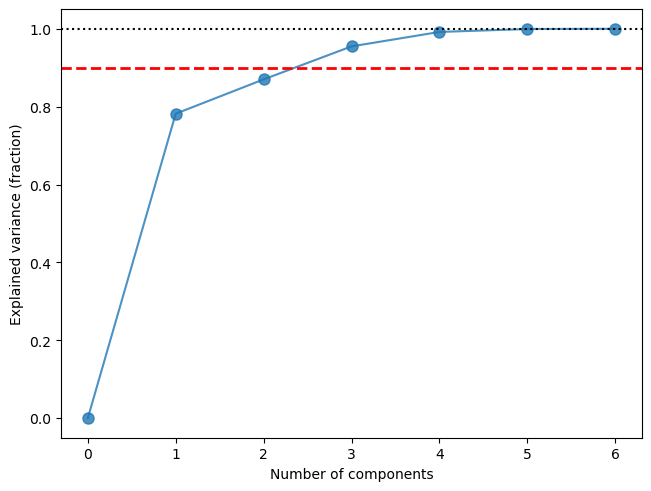

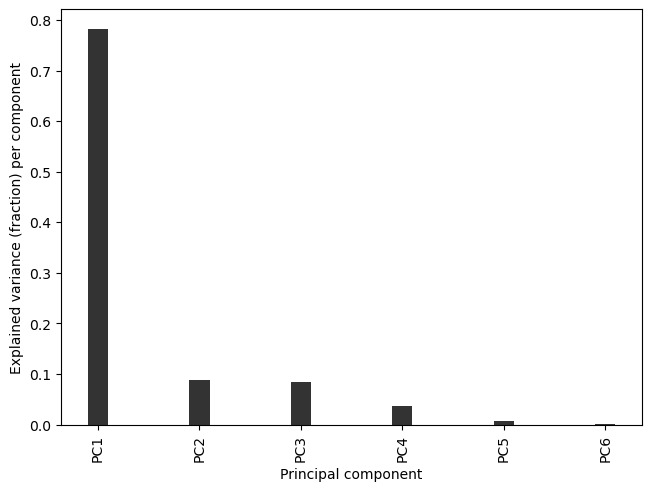

In [ ]:
from matplotlib import pyplot as plt
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = pca_explained_variance(model,  marker='o', markersize=8, alpha=0.8)

ax.axhline(y=0.9, color='r', linestyle='--', linewidth=2)

plt.show()

pca_explained_variance_bar(
    model,
    width=0.2,
    alpha=0.8,
    color='black',
)

plt.show()

In [ ]:
# Set number of components
n = 3
model = PCA(n)

# Fit PCA
model.fit(normalized_data)

# Transform data into principal components
transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

# Rename the transformed data columns
transformed_data_df.columns = [f"PC{i+1}" for i in range(n)]

transformed_data_df

,PC1,PC2,PC3
0,0.404974,0.653457,0.213107
1,-1.450115,-0.177311,-0.317073
2,-1.418851,-0.124287,-0.312228
3,-0.991040,0.177519,-0.220050
4,-1.681687,-0.523983,0.031674
...,...,...,...
185434,-0.093494,0.658519,-0.168760
185435,-0.425518,0.288981,-0.128965
185436,-1.530961,-0.369502,-0.174329
185437,-1.676179,-0.536673,-0.018570


In [ ]:
#check components
components_df = pd.DataFrame(model.components_)

components_df.columns = filtered_taxi_data_num.columns
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]

components_df

,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,trip_duration_minutes
PC1,0.439748,0.449491,0.352285,0.366334,0.457749,0.369784
PC2,-0.128141,-0.029611,0.643939,-0.708874,0.017582,0.255410
PC3,0.051366,0.132807,-0.601921,-0.302632,-0.058222,0.722799


In [ ]:
components_df = pd.DataFrame(model.components_)

# Rename the columns
components_df.columns = filtered_taxi_data_num.columns

# Rename the rows
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]

# selects the first 3 PCs
loadings = components_df.iloc[:6, :].mul(np.sqrt(model.explained_variance_), axis=0)

loadings_df = pd.DataFrame(loadings)
loadings_df

,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,trip_duration_minutes
PC1,0.952517,0.973621,0.763068,0.793500,0.991510,0.800972
PC2,-0.093186,-0.021533,0.468284,-0.515506,0.012786,0.185738
PC3,0.036635,0.094718,-0.429291,-0.215838,-0.041524,0.515502


###K-Means Clustering

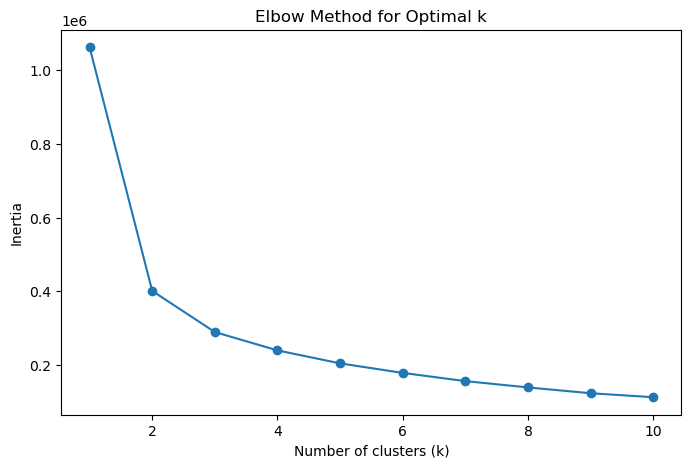

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(transformed_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, init='random', random_state=42)
kmeans_result = kmeans.fit(transformed_data_df)

filtered_taxi_data_num["cluster_labels"] = kmeans_result.labels_
filtered_taxi_data['cluster_labels'] = kmeans_result.labels_

/Users/christina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/1z/cszw79s57xlcbdgy54fblh9c0000gn/T/ipykernel_25749/1151105205.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_taxi_data['cluster_labels'] = kmeans_result.labels_


/Users/christina/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


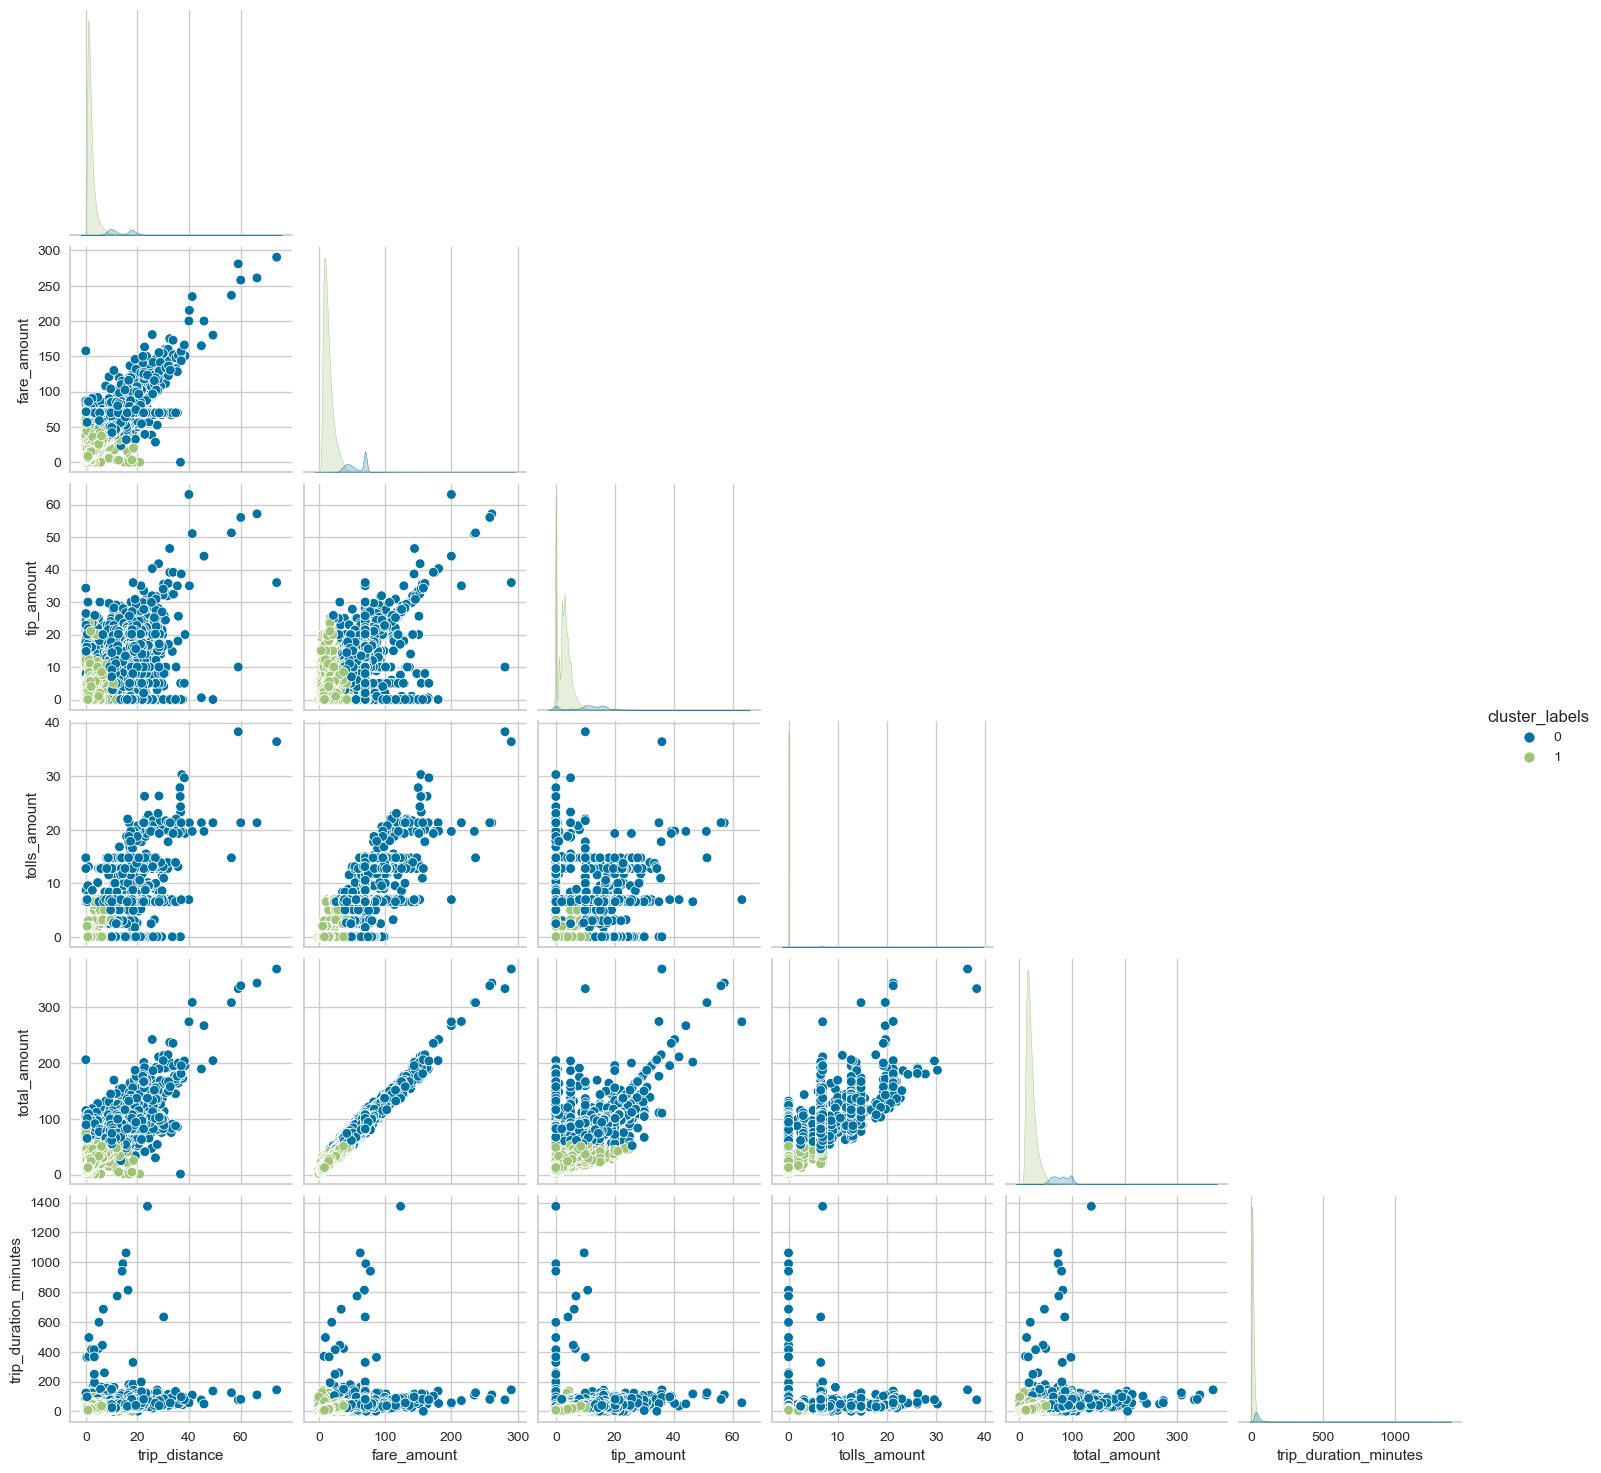

In [ ]:
import seaborn as sns
sns.pairplot(filtered_taxi_data_num, hue = 'cluster_labels', corner = True)

Cluster 0 (blue): Long rides and Higher Cost

Cluster 1 (green): Short rides and Lower Cost

/Users/christina/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


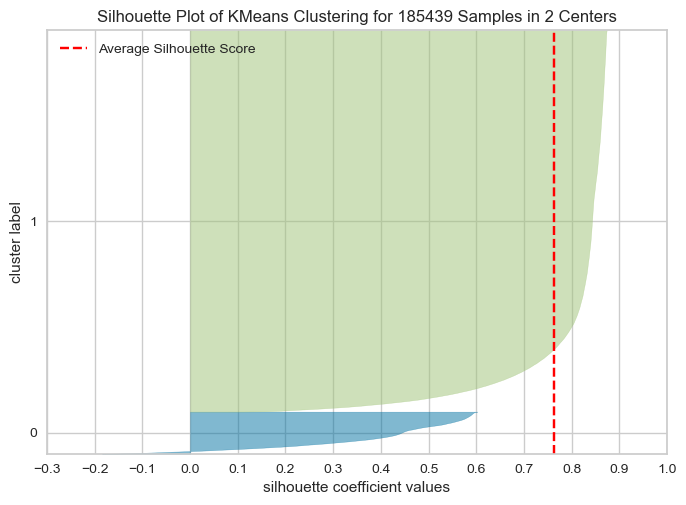

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 185439 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#takes 20 mins
#the dataset was filtered_taxi_data_num, but to match it with the K-means I changed it to transformed_data_df (the PCA dataframe)

from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(transformed_data_df)
visualizer.show()

Based on the pair plot and silhouette score, we can observe that the two clusters show distinct characteristics. The first cluster is associated with lower fares, shorter trips, and fewer surcharges, while the second cluster represents higher fares, longer trips, and more surcharges. This distinction suggests differences in ride pricing patterns across the dataset. Additionally, the silhouette plot indicates that the K-Means clustering algorithm was successful, as the average silhouette score exceeded 0.7, which is considered a good clustering quality. However, the significant imbalance in cluster sizes raises concerns about the effectiveness of the clustering approach. Despite the high silhouette score, the imbalance suggests that K-Means may not be the most optimal algorithm for this dataset, and further exploration with different clustering techniques may be needed to achieve a more balanced classification.

###Association Rule Mining

In [ ]:
#change datatype to objects
filtered_taxi_data['pickup_time_of_day'] = filtered_taxi_data['pickup_time_of_day'].astype(str)
filtered_taxi_data['pickup_day_of_week'] = filtered_taxi_data['pickup_day_of_week'].astype(str)
filtered_taxi_data['interborough_trip'] = filtered_taxi_data['interborough_trip'].astype(str)
#filtered_taxi_data['store_and_fwd_flag'] = filtered_taxi_data['store_and_fwd_flag'].astype(str) > didn't show a big difference between clusters (both had very high support value)

#get categorical columns
categorical_columns = ['congestion_surcharge_type', 'time_of_day', 'passenger_type','PU_Borough', 'DO_Borough','interborough_trip','day_type']
#'improve_surcharge_type', 'mta_tax_type'

#divide dataframe based on label
cluster_0_df = filtered_taxi_data[filtered_taxi_data["cluster_labels"] == 0][categorical_columns]
cluster_1_df = filtered_taxi_data[filtered_taxi_data["cluster_labels"] == 1][categorical_columns]

#change dataframe
cluster_0_encoded = pd.get_dummies(cluster_0_df)
cluster_1_encoded = pd.get_dummies(cluster_1_df)

/var/folders/1z/cszw79s57xlcbdgy54fblh9c0000gn/T/ipykernel_25749/1413082887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_taxi_data['pickup_time_of_day'] = filtered_taxi_data['pickup_time_of_day'].astype(str)
/var/folders/1z/cszw79s57xlcbdgy54fblh9c0000gn/T/ipykernel_25749/1413082887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_taxi_data['pickup_day_of_week'] = filtered_taxi_data['pickup_day_of_week'].astype(str)
/var/folders/1z/cszw79s57xlcbdgy54fblh9c0000gn/T/ipykernel_25749

In [ ]:
#jupyter notebook code
!conda install -c conda-forge mlxtend -y

Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (/Users/christina/anaconda3/lib/python3.11/site-packages/conda/plugins/types.py))
Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (/Users/christina/anaconda3/lib/python3.11/site-packages/conda/plugins/types.py))
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1



# All requested packages already installed.



In [ ]:
#frequent itemset - apriori (approximately 20 mins to run)
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items_0 = apriori(cluster_0_encoded, min_support=0.05, use_colnames=True)
frequent_items_1 = apriori(cluster_1_encoded, min_support=0.05, use_colnames=True)

# Sort by highest support(support: how frequently an itemset appears in the dataset)
frequent_items_0 = frequent_items_0.sort_values(by="support", ascending=False)
frequent_items_1 = frequent_items_1.sort_values(by="support", ascending=False)

pd.set_option('display.max_colwidth', None)

# Display top 10 frequent itemsets
print("Top 10 Frequent Itemsets - Cluster 0")
display(frequent_items_0.head(10))

print("Top 10 Frequent Itemsets - Cluster 1")
display(frequent_items_1.head(10))

Top 10 Frequent Itemsets - Cluster 0


,support,itemsets
14,0.926318,(interborough_trip_1)
0,0.785850,(congestion_surcharge_type_Fee)
27,0.749362,"(congestion_surcharge_type_Fee, interborough_trip_1)"
15,0.740077,(day_type_Weekday)
7,0.708422,(passenger_type_Single)
104,0.686322,"(day_type_Weekday, interborough_trip_1)"
9,0.670902,(PU_Borough_Queens)
83,0.653852,"(passenger_type_Single, interborough_trip_1)"
92,0.634360,"(interborough_trip_1, PU_Borough_Queens)"
28,0.584514,"(congestion_surcharge_type_Fee, day_type_Weekday)"


Top 10 Frequent Itemsets - Cluster 1


,support,itemsets
7,0.962526,(PU_Borough_Manhattan)
9,0.959269,(interborough_trip_0)
0,0.956167,(congestion_surcharge_type_Fee)
18,0.946097,"(congestion_surcharge_type_Fee, PU_Borough_Manhattan)"
8,0.937427,(DO_Borough_Manhattan)
56,0.932284,"(PU_Borough_Manhattan, DO_Borough_Manhattan)"
167,0.932284,"(PU_Borough_Manhattan, interborough_trip_0, DO_Borough_Manhattan)"
57,0.932284,"(interborough_trip_0, PU_Borough_Manhattan)"
60,0.932284,"(interborough_trip_0, DO_Borough_Manhattan)"
20,0.922813,"(congestion_surcharge_type_Fee, interborough_trip_0)"


For riders in Cluster 0, expect higher fares for interborough trips, especially on weekdays. Congestion surcharges are almost guaranteed for long-distance travel. Solo riders may want to explore ride-sharing options to reduce costs.
Timing and route planning can help manage high costs, such as avoiding peak times or congested routes. By understanding these patterns, riders can make more cost-effective decisions for long-distance travel.

For riders in Cluster 1, the highest support is for trips that both start and end in the Borough of Manhattan (0.96), indicating that most trips in this cluster are short and remain within the borough. The high support for congestion surcharges (0.956) suggests that nearly all short trips in Manhattan incur these fees, significantly impacting total fares even for shorter distances. This means that riders should be aware that short trips are not exempt from congestion fees, which can quickly add up. Additionally, since most trips are intra-borough (0.959 support for interborough_trip_0), avoiding cross-borough travel can help keep fares lower. Riders who can limit their travel to within Manhattan might save more compared to those making cross-borough trips that are subject to higher costs. Understanding these patterns can help riders make more cost-effective travel decisions within Manhattan.











In [ ]:
rules_0 = association_rules(frequent_items_0, metric="lift", min_threshold=1.0)
rules_0["cluster"] = "Cluster 0"

strong_rules_0 = rules_0[(rules_0["confidence"] > 0.8) & (rules_0["support"] > 0.1)]
strong_rules_0 = strong_rules_0.sort_values(by="lift", ascending=False)

# Define the target consequent as a frozenset
target_consequent = frozenset(["interborough_trip_1"])

# Filter rules where the consequent matches the target frozenset
filtered_rules_0 = strong_rules_0[strong_rules_0["consequents"] == target_consequent]

# Display the filtered rules without truncation
pd.set_option("display.max_colwidth", None)

print("Filtered Association Rules - Cluster 0 (Interborough Trip)")
display(filtered_rules_0.head(5))

Filtered Association Rules - Cluster 0 (Interborough Trip)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,cluster
2185,"(DO_Borough_Manhattan, passenger_type_Couple, PU_Borough_Queens)",(interborough_trip_1),0.115165,0.926318,0.115165,1.0,1.079543,1.0,0.008486,inf,0.083272,0.124326,1.0,0.562163,Cluster 0
2568,"(PU_Borough_Queens, DO_Borough_Manhattan, time_of_day_Morning)",(interborough_trip_1),0.105718,0.926318,0.105718,1.0,1.079543,1.0,0.007789,inf,0.082392,0.114127,1.0,0.557063,Cluster 0
2418,"(congestion_surcharge_type_Fee, PU_Borough_Queens, DO_Borough_Manhattan, passenger_type_Couple)",(interborough_trip_1),0.107075,0.926318,0.107075,1.0,1.079543,1.0,0.007889,inf,0.082517,0.115592,1.0,0.557796,Cluster 0
2482,"(passenger_type_Single, day_type_Weekday, PU_Borough_Queens, DO_Borough_Manhattan, time_of_day_Afternoon)",(interborough_trip_1),0.106315,0.926318,0.106315,1.0,1.079543,1.0,0.007833,inf,0.082447,0.114771,1.0,0.557386,Cluster 0
2250,"(passenger_type_Single, PU_Borough_Manhattan, DO_Borough_Queens, day_type_Weekday)",(interborough_trip_1),0.110496,0.926318,0.110496,1.0,1.079543,1.0,0.008142,inf,0.082835,0.119285,1.0,0.559642,Cluster 0


In [ ]:
rules_1 = association_rules(frequent_items_1, metric="lift", min_threshold=1.0)
rules_1["cluster"] = "Cluster 1"

strong_rules_1 = rules_1[(rules_1["confidence"] > 0.8) & (rules_1["support"] > 0.1)]
strong_rules_1 = strong_rules_1.sort_values(by="lift", ascending=False)

# Define the target consequent as a frozenset
target_consequent = frozenset(["PU_Borough_Manhattan"])

# Filter rules where the consequent matches the target frozenset
filtered_rules_1 = strong_rules_1[strong_rules_1["consequents"] == target_consequent]

# Display the filtered rules without truncation
pd.set_option("display.max_colwidth", None)

print("Filtered Association Rules - Cluster 1 (PU_Borough_Manhattan)")
display(filtered_rules_1.head(5))

Filtered Association Rules - Cluster 1 (PU_Borough_Manhattan)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,cluster
948,"(day_type_Weekday, interborough_trip_0, time_of_day_Night, DO_Borough_Manhattan)",(PU_Borough_Manhattan),0.267504,0.962526,0.267504,1.0,1.038933,1.0,0.010024,inf,0.051159,0.277918,1.0,0.638959,Cluster 1
2076,"(congestion_surcharge_type_Fee, interborough_trip_0, DO_Borough_Manhattan, time_of_day_Morning)",(PU_Borough_Manhattan),0.199447,0.962526,0.199447,1.0,1.038933,1.0,0.007474,inf,0.046810,0.207212,1.0,0.603606,Cluster 1
768,"(congestion_surcharge_type_Fee, interborough_trip_0, DO_Borough_Manhattan, time_of_day_Afternoon)",(PU_Borough_Manhattan),0.336704,0.962526,0.336704,1.0,1.038933,1.0,0.012618,inf,0.056497,0.349813,1.0,0.674907,Cluster 1
812,"(passenger_type_Single, interborough_trip_0, time_of_day_Night, DO_Borough_Manhattan)",(PU_Borough_Manhattan),0.286351,0.962526,0.286351,1.0,1.038933,1.0,0.010731,inf,0.052511,0.297500,1.0,0.648750,Cluster 1
841,"(passenger_type_Single, interborough_trip_0, congestion_surcharge_type_Fee, DO_Borough_Manhattan, time_of_day_Night)",(PU_Borough_Manhattan),0.282771,0.962526,0.282771,1.0,1.038933,1.0,0.010597,inf,0.052248,0.293780,1.0,0.646890,Cluster 1


In Cluster 0 (interborough trips), most rides occur between Queens and Manhattan, often involving couples or solo passengers during morning and afternoon weekdays. With a confidence of 1.0 and a lift of 1.0795, these patterns strongly indicate that interborough trips dominate this cluster. The frequent use of congestion surcharges further highlights the higher costs of these longer routes.

In Cluster 1 (intra-borough trips within Manhattan), most rides start and end in Manhattan, especially during night and morning hours on weekdays. The confidence of 1.0 and lift of 1.0389 suggest a consistent pattern of short, solo trips within the borough. Congestion surcharges are also common, indicating that even short trips often face additional fees.

In [ ]:
rules_0 = association_rules(frequent_items_0, metric="lift", min_threshold=1.0)
rules_0["cluster"] = "Cluster 0"

strong_rules_0 = rules_0[(rules_0["confidence"] > 0.8) & (rules_0["support"] > 0.1)]
strong_rules_0 = strong_rules_0.sort_values(by="lift", ascending=False)

# Define the target consequent as a frozenset
target_consequent = frozenset(["congestion_surcharge_type_Fee"])

# Filter rules where the consequent matches the target frozenset
filtered_rules_0 = strong_rules_0[strong_rules_0["consequents"] == target_consequent]

# Display the filtered rules without truncation
pd.set_option("display.max_colwidth", None)

print("Filtered Association Rules - Cluster 0 (Congestion_Surcharge_type_Fee)")
display(filtered_rules_0.head(5))

Filtered Association Rules - Cluster 0 (Interborough Trip)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,cluster
704,"(DO_Borough_Queens, PU_Borough_Manhattan)",(congestion_surcharge_type_Fee),0.208123,0.78585,0.198784,0.955127,1.215406,1.0,0.035230,4.772307,0.223809,0.249983,0.790458,0.604040,Cluster 0
711,"(DO_Borough_Queens, PU_Borough_Manhattan, interborough_trip_1)",(congestion_surcharge_type_Fee),0.208123,0.78585,0.198784,0.955127,1.215406,1.0,0.035230,4.772307,0.223809,0.249983,0.790458,0.604040,Cluster 0
1376,"(day_type_Weekday, PU_Borough_Manhattan, DO_Borough_Queens)",(congestion_surcharge_type_Fee),0.153608,0.78585,0.146386,0.952987,1.212683,1.0,0.025674,4.555115,0.207212,0.184582,0.780467,0.569632,Cluster 0
1348,"(day_type_Weekday, PU_Borough_Manhattan, DO_Borough_Queens, interborough_trip_1)",(congestion_surcharge_type_Fee),0.153608,0.78585,0.146386,0.952987,1.212683,1.0,0.025674,4.555115,0.207212,0.184582,0.780467,0.569632,Cluster 0
2665,"(passenger_type_Single, PU_Borough_Manhattan, DO_Borough_Queens, day_type_Weekday)",(congestion_surcharge_type_Fee),0.110496,0.78585,0.104957,0.949877,1.208726,1.0,0.018124,4.272502,0.194133,0.132624,0.765945,0.541718,Cluster 0


In [ ]:
rules_1 = association_rules(frequent_items_1, metric="lift", min_threshold=1.0)
rules_1["cluster"] = "Cluster 1"

strong_rules_1 = rules_1[(rules_1["confidence"] > 0.8) & (rules_1["support"] > 0.1)]
strong_rules_1 = strong_rules_1.sort_values(by="lift", ascending=False)

# Define the target consequent as a frozenset
target_consequent = frozenset(["congestion_surcharge_type_Fee"])

# Filter rules where the consequent matches the target frozenset
filtered_rules_1 = strong_rules_1[strong_rules_1["consequents"] == target_consequent]

# Display the filtered rules without truncation
pd.set_option("display.max_colwidth", None)

print("Filtered Association Rules - Cluster 1 (PU_Borough_Manhattan)")
display(filtered_rules_1.head(5))

Filtered Association Rules - Cluster 1 (PU_Borough_Manhattan)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,cluster
1023,"(day_type_Weekday, PU_Borough_Manhattan, time_of_day_Night, DO_Borough_Manhattan)",(congestion_surcharge_type_Fee),0.267504,0.956167,0.264432,0.988518,1.033834,1.0,0.008654,3.817533,0.044678,0.275669,0.738051,0.632536,Cluster 1
1034,"(day_type_Weekday, PU_Borough_Manhattan, time_of_day_Night, interborough_trip_0)",(congestion_surcharge_type_Fee),0.267504,0.956167,0.264432,0.988518,1.033834,1.0,0.008654,3.817533,0.044678,0.275669,0.738051,0.632536,Cluster 1
983,"(day_type_Weekday, PU_Borough_Manhattan, interborough_trip_0, DO_Borough_Manhattan, time_of_day_Night)",(congestion_surcharge_type_Fee),0.267504,0.956167,0.264432,0.988518,1.033834,1.0,0.008654,3.817533,0.044678,0.275669,0.738051,0.632536,Cluster 1
1045,"(day_type_Weekday, interborough_trip_0, time_of_day_Night, DO_Borough_Manhattan)",(congestion_surcharge_type_Fee),0.267504,0.956167,0.264432,0.988518,1.033834,1.0,0.008654,3.817533,0.044678,0.275669,0.738051,0.632536,Cluster 1
615,"(interborough_trip_0, PU_Borough_Manhattan, time_of_day_Night)",(congestion_surcharge_type_Fee),0.385332,0.956167,0.380854,0.988378,1.033687,1.0,0.012412,3.771416,0.053019,0.396456,0.734848,0.693345,Cluster 1


In Cluster 0 (interborough trips), most rides between Manhattan and Queens involve congestion surcharges, with a confidence of over 95% and a lift above 1.2, indicating that these fees are almost guaranteed on such routes. The high confidence and lift suggest that weekday trips, especially for solo passengers, are particularly affected by these additional costs. Overall, these patterns highlight that congestion surcharges significantly impact interborough trips between Manhattan and Queens, making them notably more expensive.

In Cluster 1 (intra-borough trips within Manhattan), most night time weekday trips starting in Manhattan incur congestion surcharges, with a confidence of nearly 99% and a lift of 1.0338, indicating that these fees are almost unavoidable. The high confidence suggests that even short, intra-borough trips at night are heavily impacted by congestion pricing. Overall, these patterns emphasize that congestion surcharges are a consistent cost factor for nighttime weekday trips within Manhattan.

In [ ]:
#display average total amount and surcharge summary of both clusters

# Group by cluster and compute descriptive statistics
total_amount_summary = filtered_taxi_data.groupby("cluster_labels")["total_amount"].describe()
congestion_surcharge_summary = filtered_taxi_data.groupby("cluster_labels")["congestion_surcharge"].describe()

# Display results separately for clarity
print("Average Total Amount by Cluster:")
display(total_amount_summary["mean"])

print("Congestion Surcharge Summary by Cluster:")
display(congestion_surcharge_summary)

Average Total Amount by Cluster:


cluster_labels
0    80.093221
1    21.826451
Name: mean, dtype: float64

Congestion Surcharge Summary by Cluster:


,count,mean,std,min,25%,50%,75%,max
cluster_labels,,,,,,,,
0,18417.0,1.964625,1.025606,0.0,2.5,2.5,2.5,2.5
1,167022.0,2.390419,0.511808,0.0,2.5,2.5,2.5,2.5


Cluster 1 has a significantly higher average total amount compared to Cluster 0. While the average total fare in Cluster 0 is around 21, Cluster 1 has an average of approximately 80, nearly four times higher. This aligns with the pair plot insights, where Cluster 0 consists mainly of short, lower-cost trips, whereas Cluster 1 includes longer trips with higher fares, tips, and toll fees.

However, analyzing the congestion surcharge summary reveals an unexpected trend. Despite the assumption that higher fares in Cluster 1 would result in higher surcharges, the average congestion surcharge is only 1.96 in Cluster 1, while Cluster 0 has a slightly higher average of 2.4. This suggests that congestion surcharges do not significantly impact the total amount and are more frequently applied to shorter trips rather than longer ones.

In [ ]:
#confirm statistical significance

from scipy.stats import ttest_ind

#difference in total amount
cluster_0_fare = filtered_taxi_data[filtered_taxi_data["cluster_labels"] == 0]["total_amount"]
cluster_1_fare = filtered_taxi_data[filtered_taxi_data["cluster_labels"] == 1]["total_amount"]

t_stat, p_value = ttest_ind(cluster_0_fare, cluster_1_fare, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

#difference in congestion surcharge
cluster_0_cong = filtered_taxi_data[filtered_taxi_data["cluster_labels"] == 0]["congestion_surcharge"]
cluster_1_cong = filtered_taxi_data[filtered_taxi_data["cluster_labels"] == 1]["congestion_surcharge"]

t_stat_cong, p_value_cong = ttest_ind(cluster_0_cong, cluster_1_cong, equal_var=False)
print(f"T-statistic (Congestion): {t_stat_cong}, P-value: {p_value_cong}")

T-statistic: 419.1112690015523, P-value: 0.0
T-statistic (Congestion): -55.58344524293542, P-value: 0.0


From the T-test, we examined the statistical significance between the two clusters, and based on the p-value, we can confidently conclude that the results are highly reliable and not due to randomness.

# Attempted: Hierarchical Clustering:

In [ ]:
#check best number of clusters
import pandas as pd
from sklearn.metrics import silhouette_score

df_scores = pd.DataFrame(columns=['num_clusters', 'silhouette_score'])
df_normalized_without_labels = normalized_data.drop('cluster_labels', axis=1)

Z = linkage(df_normalized_without_labels, 'ward')

for num_cluster in range(2, 10):
  print("# cluster = ", num_cluster)
  labels = fcluster(Z, num_cluster, criterion='maxclust')
  score = silhouette_score(df_normalized_without_labels, labels)

  df_scores = pd.concat([df_scores, pd.DataFrame([[num_cluster, score]], columns=['num_clusters', 'silhouette_score'])], ignore_index=True)


In [ ]:
df_scores.plot.line(x='num_clusters', y='silhouette_score')

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

linkage_methods = ['single', 'ward', 'centroid', 'complete', 'average']
n_clusters = 2

silhouette_scores = {}

for method in linkage_methods:
    Z = linkage(normalized_data, method=method)
    cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')

    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    silhouette_scores[method] = silhouette_avg

    print(f"Silhouette Score for {method}: {silhouette_avg:.4f}")

In [ ]:
Z = linkage(normalized_data, method = 'ward')
taxi_data['cluster_labels'] = fcluster(Z, n_clusters, criterion='maxclust').astype(str)

from scipy.cluster.hierarchy import dendrogram

dendrogram(Z)